In [ ]:
%tensorflow_version 2.x

import tensorflow as tf


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz

--2023-10-16 15:43:24--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2023-10-16 15:43:24--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca8ccb7792fbe1a90356251961c.dl.dropboxusercontent.com/cd/0/inline/CFvxlWz7yHthjbHYnfBxHw1IM6lET8kHWkwpDtF0DqZmzlpwxy4F00BChQaYrH4srzNI7AG_EqTuxreXg7nr4iIB8BPFoBgpxKepKlUrstVFVMCc_YqcNxlepBkhSEHO_jI/file# [following]
--2023-10-16 15:43:25--  https://uca8ccb7792fbe1a90356251961c.dl.dropboxusercontent.com/cd/0/inline/CFvxlWz7yHthjbHYnfBxHw1IM6lET8kHWkwpDtF0DqZmzlpwxy4F00BChQaYrH4srzNI7AG_EqTuxreXg7nr4iIB8BPFoBgpxKepKlUrstVFVMCc_YqcN

In [ ]:

import tarfile


file = tarfile.open('genres.tar.gz')


file.extractall('./music')

file.close()

In [ ]:
!rm genres.tar.gz


In [ ]:
import os
import gc
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
from glob import iglob
import pickle
import pandas as pd
import pathlib as path

In [ ]:
%cd /content/

/content


*** Spectogram images extraction using Audio***

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
!pip install path
from path import Path
from glob import glob
import numpy as np


In [ ]:
import os
os.mkdir('train')
os.mkdir('JPEG')

In [ ]:
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[6.4, 4.8])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref= np.max))
    filename  = '/content/JPEG/' + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [ ]:
glob('./train/*')

[]

In [ ]:
!wget https://www.dropbox.com/s/u7fdk6txta597yn/genres%20all.zip

--2023-10-16 15:45:04--  https://www.dropbox.com/s/u7fdk6txta597yn/genres%20all.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u7fdk6txta597yn/genres%20all.zip [following]
--2023-10-16 15:45:05--  https://www.dropbox.com/s/raw/u7fdk6txta597yn/genres%20all.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca40aa17236b53257c686526cd0.dl.dropboxusercontent.com/cd/0/inline/CFve7g7mAewpydFFjptYy4Za0CUgXsPReOl-Eqq8w_Ptvtd2QIq79fhMNCXrbNwoOZvlB_YeZR86GL5wDkTUfW4meXjVH1fQTWR53SfkrDxqiP3SKPLYGVs39jgvABIZRMgHWO-b2jAA4UiQV0DS0Ob9/file# [following]
--2023-10-16 15:45:06--  https://uca40aa17236b53257c686526cd0.dl.dropboxusercontent.com/cd/0/inline/CFve7g7mAewpydFFjptYy4Za0CUgXsPReOl-Eqq8w_Ptvtd2QIq79fhMNCXrbNwoOZvlB_YeZR86GL5wDkTUfW4me

In [ ]:
!unzip genres\ all.zip

Archive:  genres all.zip
   creating: all_files/
  inflating: all_files/blues.00001.au  
  inflating: all_files/blues.00002.au  
  inflating: all_files/blues.00003.au  
  inflating: all_files/blues.00004.au  
  inflating: all_files/blues.00005.au  
  inflating: all_files/blues.00006.au  
  inflating: all_files/blues.00007.au  
  inflating: all_files/blues.00008.au  
  inflating: all_files/blues.00009.au  
  inflating: all_files/blues.00010.au  
  inflating: all_files/blues.00011.au  
  inflating: all_files/blues.00012.au  
  inflating: all_files/blues.00013.au  
  inflating: all_files/blues.00014.au  
  inflating: all_files/blues.00015.au  
  inflating: all_files/blues.00016.au  
  inflating: all_files/blues.00017.au  
  inflating: all_files/blues.00018.au  
  inflating: all_files/blues.00019.au  
  inflating: all_files/blues.00020.au  
  inflating: all_files/blues.00021.au  
  inflating: all_files/blues.00022.au  
  inflating: all_files/blues.00023.au  
  inflating: all_files/blues.00

In [ ]:
!rm genres\ all.zip

In [ ]:
file_list=list(glob("/content/all_files/*"))

In [ ]:
for i,file in enumerate(file_list):
  print(i)
  filename,name = file,(file.split('/')[-1].split('.')[0] + "." + (file.split('/')[-1].split('.')[1]))
  create_spectrogram(filename, name)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

**Spliting the Train and Test sets**


In [ ]:
pip install split-folders

In [ ]:
#import splitfolders
#splitfolders.ratio('JPEG/', output= "output", seed=1337, ratio=(.80,0.1,0.1))

In [ ]:
root_dir = '/content'
os.makedirs(root_dir +'/train4')
os.makedirs(root_dir +'/val4')
src = "/content/JPEG"

In [ ]:
import shutil
allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.85)])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))

# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "/content/train4")

for name in val_FileNames:
    shutil.copy(name, "/content/val4")


Total images:  1000
Training:  850
Validation:  150


**Feature extraction using File Names**

**Split the Spectograms to respective folders using feature CSV info in to respective folders**


**For Train set**

In [ ]:
k = os.listdir("/content/train4")

In [ ]:
k.sort()
k

['blues.00000.jpg',
 'blues.00001.jpg',
 'blues.00002.jpg',
 'blues.00003.jpg',
 'blues.00004.jpg',
 'blues.00005.jpg',
 'blues.00006.jpg',
 'blues.00007.jpg',
 'blues.00008.jpg',
 'blues.00009.jpg',
 'blues.00010.jpg',
 'blues.00011.jpg',
 'blues.00012.jpg',
 'blues.00013.jpg',
 'blues.00014.jpg',
 'blues.00015.jpg',
 'blues.00016.jpg',
 'blues.00017.jpg',
 'blues.00018.jpg',
 'blues.00019.jpg',
 'blues.00020.jpg',
 'blues.00021.jpg',
 'blues.00022.jpg',
 'blues.00024.jpg',
 'blues.00025.jpg',
 'blues.00026.jpg',
 'blues.00027.jpg',
 'blues.00028.jpg',
 'blues.00029.jpg',
 'blues.00030.jpg',
 'blues.00031.jpg',
 'blues.00032.jpg',
 'blues.00033.jpg',
 'blues.00034.jpg',
 'blues.00036.jpg',
 'blues.00037.jpg',
 'blues.00038.jpg',
 'blues.00039.jpg',
 'blues.00040.jpg',
 'blues.00042.jpg',
 'blues.00043.jpg',
 'blues.00044.jpg',
 'blues.00045.jpg',
 'blues.00046.jpg',
 'blues.00047.jpg',
 'blues.00048.jpg',
 'blues.00049.jpg',
 'blues.00050.jpg',
 'blues.00051.jpg',
 'blues.00052.jpg',


In [ ]:
df = pd.DataFrame(k, columns=['File_Name'])
df.head()

,File_Name
0,blues.00000.jpg
1,blues.00001.jpg
2,blues.00002.jpg
3,blues.00003.jpg
4,blues.00004.jpg


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['File_Name'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_2, *['index', 'count()', 'File_Name'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_4, *['index', 'File_Name'], **{'inner': 'stick'})
chart

In [ ]:
s = df.File_Name.str.split(".", expand=True)
type(s)

pandas.core.frame.DataFrame

In [ ]:
s.columns = (['Genres','File_number','File_type'])
s

,Genres,File_number,File_type
0,blues,00000,jpg
1,blues,00001,jpg
2,blues,00002,jpg
3,blues,00003,jpg
4,blues,00004,jpg
...,...,...,...
845,rock,00094,jpg
846,rock,00095,jpg
847,rock,00096,jpg
848,rock,00098,jpg


No charts were generated by quickchart


In [ ]:
sample = pd.concat([df, s['Genres']], axis=1)

In [ ]:
sample.to_csv("features.CSV", index = False)

In [ ]:
labels=pd.read_csv('/content/features.CSV')

In [ ]:
labels

,File_Name,Genres
0,blues.00000.jpg,blues
1,blues.00001.jpg,blues
2,blues.00002.jpg,blues
3,blues.00003.jpg,blues
4,blues.00004.jpg,blues
...,...,...
845,rock.00094.jpg,rock
846,rock.00095.jpg,rock
847,rock.00096.jpg,rock
848,rock.00098.jpg,rock


In [ ]:
labels['Genres'].value_counts()

blues        91
country      89
metal        88
disco        86
pop          85
classical    84
reggae       83
rock         83
jazz         81
hiphop       80
Name: Genres, dtype: int64

In [ ]:
classes=list(labels['Genres'].value_counts().index)

In [ ]:
for cl in classes:
  os.mkdir('/content/train4/'+cl)

In [ ]:
class_dict_map={x:'/content/train4/'+ x+'/' for x in classes}

In [ ]:
class_dict_map

{'blues': '/content/train/blues/',
 'country': '/content/train/country/',
 'metal': '/content/train/metal/',
 'disco': '/content/train/disco/',
 'pop': '/content/train/pop/',
 'classical': '/content/train/classical/',
 'reggae': '/content/train/reggae/',
 'rock': '/content/train/rock/',
 'jazz': '/content/train/jazz/',
 'hiphop': '/content/train/hiphop/'}

In [ ]:
import shutil

In [ ]:
def return_class(f_name):
  cl=labels['Genres'][labels['File_Name']==f_name]
  return(cl.values[0])

In [ ]:
for f_name in k:
  name = f_name.split('.')[0] + "." + (f_name.split('.'))[1] + ".jpg"
  shutil.move('/content/train4/'+name, class_dict_map[return_class(f_name)]+name)

**For Validation set**

In [ ]:
y = os.listdir("/content/val4")

In [ ]:
y.sort()
y

['blues.00023.jpg',
 'blues.00035.jpg',
 'blues.00041.jpg',
 'blues.00066.jpg',
 'blues.00078.jpg',
 'blues.00079.jpg',
 'blues.00086.jpg',
 'blues.00089.jpg',
 'blues.00096.jpg',
 'classical.00006.jpg',
 'classical.00021.jpg',
 'classical.00024.jpg',
 'classical.00028.jpg',
 'classical.00035.jpg',
 'classical.00037.jpg',
 'classical.00043.jpg',
 'classical.00044.jpg',
 'classical.00046.jpg',
 'classical.00067.jpg',
 'classical.00071.jpg',
 'classical.00072.jpg',
 'classical.00079.jpg',
 'classical.00082.jpg',
 'classical.00085.jpg',
 'classical.00087.jpg',
 'country.00001.jpg',
 'country.00014.jpg',
 'country.00018.jpg',
 'country.00020.jpg',
 'country.00024.jpg',
 'country.00045.jpg',
 'country.00072.jpg',
 'country.00081.jpg',
 'country.00087.jpg',
 'country.00088.jpg',
 'country.00092.jpg',
 'disco.00004.jpg',
 'disco.00006.jpg',
 'disco.00009.jpg',
 'disco.00014.jpg',
 'disco.00031.jpg',
 'disco.00043.jpg',
 'disco.00049.jpg',
 'disco.00053.jpg',
 'disco.00054.jpg',
 'disco.00056.

In [ ]:
df = pd.DataFrame(y, columns=['File_Name'])
df.head()

,File_Name
0,blues.00023.jpg
1,blues.00035.jpg
2,blues.00041.jpg
3,blues.00066.jpg
4,blues.00078.jpg


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['File_Name'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['index', 'count()', 'File_Name'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['index', 'File_Name'], **{'inner': 'stick'})
chart

In [ ]:
p = df.File_Name.str.split(".", expand=True)
type(p)

pandas.core.frame.DataFrame

In [ ]:
p.columns = (['Genres','File_number','File_type'])
p

,Genres,File_number,File_type
0,blues,00023,jpg
1,blues,00035,jpg
2,blues,00041,jpg
3,blues,00066,jpg
4,blues,00078,jpg
...,...,...,...
145,rock,00069,jpg
146,rock,00076,jpg
147,rock,00080,jpg
148,rock,00083,jpg


In [ ]:
sample = pd.concat([df, p['Genres']], axis=1)

In [ ]:
sample.to_csv("featval.CSV", index = False)

In [ ]:
labels=pd.read_csv('/content/featval.CSV')

In [ ]:
labels

,File_Name,Genres
0,blues.00023.jpg,blues
1,blues.00035.jpg,blues
2,blues.00041.jpg,blues
3,blues.00066.jpg,blues
4,blues.00078.jpg,blues
...,...,...
145,rock.00069.jpg,rock
146,rock.00076.jpg,rock
147,rock.00080.jpg,rock
148,rock.00083.jpg,rock


No charts were generated by quickchart


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_10, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['index'], **{})
chart

In [ ]:
labels['Genres'].value_counts()

hiphop       20
jazz         19
reggae       17
rock         17
classical    16
pop          15
disco        14
metal        12
country      11
blues         9
Name: Genres, dtype: int64

In [ ]:
classes=list(labels['Genres'].value_counts().index)

In [ ]:
for cl in classes:
  os.mkdir('/content/val4/'+cl)

In [ ]:
class_dict_map={x:'/content/val4/'+ x+'/' for x in classes}

In [ ]:
class_dict_map

{'hiphop': '/content/val/hiphop/',
 'jazz': '/content/val/jazz/',
 'reggae': '/content/val/reggae/',
 'rock': '/content/val/rock/',
 'classical': '/content/val/classical/',
 'pop': '/content/val/pop/',
 'disco': '/content/val/disco/',
 'metal': '/content/val/metal/',
 'country': '/content/val/country/',
 'blues': '/content/val/blues/'}

In [ ]:
import shutil

In [ ]:
def return_class(f_name):
  cl=labels['Genres'][labels['File_Name']==f_name]
  return(cl.values[0])

In [ ]:
for f_name in y:
  name = f_name.split('.')[0] + "." + (f_name.split('.'))[1] + ".jpg"
  shutil.move('/content/val4/'+name, class_dict_map[return_class(f_name)]+name)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
WIDTH = 64
HEIGHT = 64
BATCH_SIZE = 32
#train set
TRAIN_DIR=r'/content/train4'

# data prep
train_datagen = ImageDataGenerator(
    rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    seed = 16,
        batch_size=BATCH_SIZE,
        class_mode='categorical')



Found 850 images belonging to 10 classes.


In [ ]:
WIDTH = 64
HEIGHT = 64
BATCH_SIZE = 32
#Validation set
valdi_DIR=r'/content/val4'

# data prep
valdi_datagen = ImageDataGenerator(
    rescale=1./255.)

valdi_generator = valdi_datagen.flow_from_directory(
    valdi_DIR,
    target_size=(HEIGHT, WIDTH),
    seed=19,
    batch_size=BATCH_SIZE,
    class_mode='categorical')


Found 150 images belonging to 10 classes.


In [ ]:
!pip install tensorflow

In [ ]:
pip install keras

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import regularizers, optimizers


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(tf.keras.optimizers.legacy.RMSprop(learning_rate= 0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import plot_model

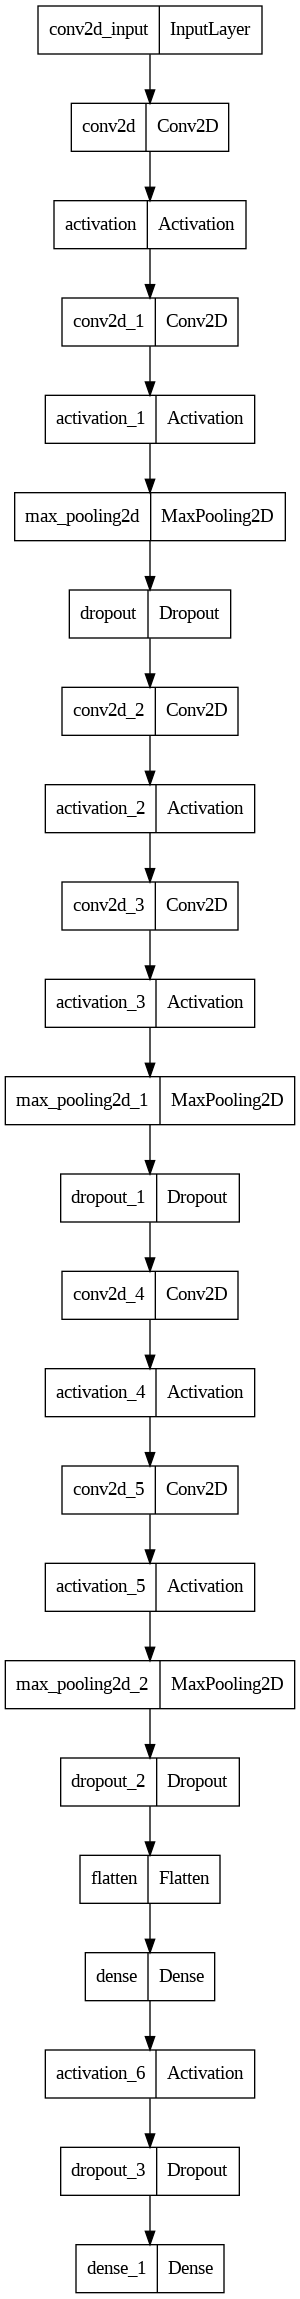

In [ ]:
plot_model(model)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALDI = valdi_generator.n//valdi_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valdi_generator,
                    validation_steps=STEP_SIZE_VALDI,
                    epochs=50,
                    verbose=1
                    )


<ipython-input-99-b6ad0d548aea>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/50
26/26 [==============================] - 56s 2s/step - loss: 2.3153 - accuracy: 0.0844 - val_loss: 2.3045 - val_accuracy: 0.0859
Epoch 2/50
26/26 [==============================] - 46s 2s/step - loss: 2.2296 - accuracy: 0.1516 - val_loss: 2.1515 - val_accuracy: 0.1719
Epoch 3/50
26/26 [==============================] - 45s 2s/step - loss: 2.0573 - accuracy: 0.2139 - val_loss: 2.1200 - val_accuracy: 0.2344
Epoch 4/50
26/26 [==============================] - 44s 2s/step - loss: 1.9919 - accuracy: 0.2714 - val_loss: 2.0019 - val_accuracy: 0.2734
Epoch 5/50
26/26 [==============================] - 45s 2s/step - loss: 1.9290 - accuracy: 0.2848 - val_loss: 1.9589 - val_accuracy: 0.2656
Epoch 6/50
26/26 [==============================] - 44s 2s/step - loss: 1.8344 - accuracy: 0.3325 - val_loss: 1.7999 - val_accuracy: 0.3516
Epoch 7/50
26/26 [==============================] - 42s 2s/step - loss: 1.8099 - accuracy: 0.3411 - val_loss: 1.8586 - val_accuracy: 0.3438
Epoch 8/50
26/26 [==

In [ ]:
model.evaluate_generator(generator=valdi_generator, steps=STEP_SIZE_VALDI)

<ipython-input-100-85bcc8a03d5b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=valdi_generator, steps=STEP_SIZE_VALDI)


[2.042088508605957, 0.5078125]

In [ ]:
# Saving the model

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
model_json = model.to_json()

In [ ]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights

<bound method Model.save_weights of <keras.src.engine.sequential.Sequential object at 0x7ce5a08294e0>>

In [ ]:
model.save_weights("model.h5")